In [ ]:
# yfinance
# Liquidity analysis and Moving Average

# Company Sector (sector)
# P/E Ratio (trailingPE) - The trailing P/E ratio is calculated by dividing a company's current share price by its earnings per share (EPS) over the past 12 months.
# Company Beta - Beta measures the level of correlation between a stock and the S&P 500 stock index. It is sometimes considered a measure of risk. Higher the Beta, less stable.

# Zalando Liquidity Measures
# working_capital = current_assets - current_liabilities = 2.665300e+09
# current_ratio = current_assets / current_liabilities = 1.501128e+00
# quick_ratio = (current_assets - inventory) / current_liabilities = 1.209754e+00
# cash_ratio = (cash_and_equivalents + receivables) / current_liabilities = 5.982213e-01


In [ ]:
#!pip install mplfinance

In [115]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates

In [116]:
# Fetch balance sheet data for a company (e.g.Adidas AG: ADS.DE, HUGO BOSS AG: BOSS.DE, Zalando SE: ZAL.DE, ...)
ticker = "ZAL.DE"
company = yf.Ticker(ticker)
company_info = company.info
balance_sheet = company.balance_sheet

In [117]:
print("Company Sector:", company.info['sector'])
# Zalando thus traded at about 25 times trailing earnings. It makes sense only if we compare it to anothe company or to global index.
print("P/E Ratio:", company.info['trailingPE'])
# Higher the beta, riskier and less stable the business is.
print("Company Beta:", company.info['beta'])

Company Sector: Consumer Cyclical
P/E Ratio: 24.95652
Company Beta: 1.849


In [ ]:
data = company.history(period="max")
print(data.to_string())

In [119]:
print(balance_sheet)

                                                    2024-12-31    2023-12-31  \
Treasury Shares Number                            4.738381e+06  3.276578e+06   
Ordinary Shares Number                            2.591993e+08  2.604954e+08   
Share Issued                                      2.639376e+08  2.637720e+08   
Total Debt                                        1.725500e+09  1.851600e+09   
Tangible Book Value                               2.263100e+09  1.973900e+09   
...                                                        ...           ...   
Cash Cash Equivalents And Short Term Investments  2.690900e+09  2.641200e+09   
Other Short Term Investments                      1.031000e+08  1.080000e+08   
Cash And Cash Equivalents                         2.587800e+09  2.533200e+09   
Cash Equivalents                                  1.315400e+09  1.738100e+09   
Cash Financial                                    1.272400e+09  7.951000e+08   

                                       

In [120]:
# The balance sheet data is typically by date, with the most recent year first
latest_balance_sheet = balance_sheet.iloc[:, 0]

In [121]:
# Extract the necessary values from the balance sheet
current_assets = latest_balance_sheet.loc["Total Assets"]
current_liabilities = latest_balance_sheet.loc["Total Liabilities Net Minority Interest"]
cash_and_equivalents = latest_balance_sheet.loc["Cash And Cash Equivalents"]
receivables = latest_balance_sheet.loc["Accounts Receivable"]
inventory = latest_balance_sheet.loc["Inventory"]

In [122]:
# Calculate the liquidity ratios
working_capital = current_assets - current_liabilities
current_ratio = current_assets / current_liabilities
quick_ratio = (current_assets - inventory) / current_liabilities
cash_ratio = (cash_and_equivalents + receivables) / current_liabilities

In [123]:
# Display the results
liquidity_metrics = pd.Series({
    "Working Capital": working_capital,
    "Current Ratio": current_ratio,
    "Quick Ratio": quick_ratio,
    "Cash Ratio": cash_ratio
})

print(f"Liquidity Analysis for {ticker}:")
print(liquidity_metrics)

Liquidity Analysis for ZAL.DE:
Working Capital    2.665300e+09
Current Ratio      1.501128e+00
Quick Ratio        1.209754e+00
Cash Ratio         5.982213e-01
dtype: float64


In [ ]:
start_date = datetime.datetime(2025, 9, 1)
end_date = datetime.datetime(2025, 10, 31)
data = company.history(start=start_date, end=end_date)
print(data.to_string())

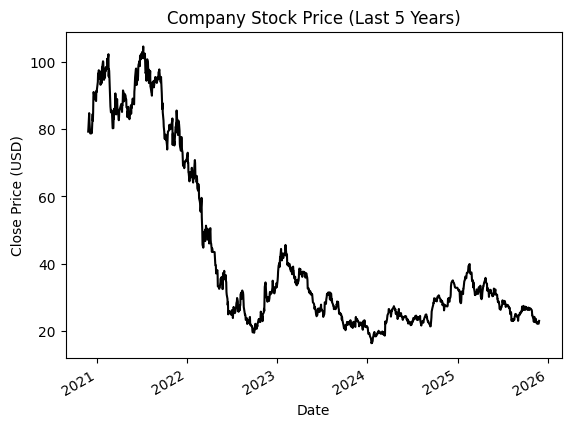

In [125]:
data = company.history(period="5y")
# print(data.to_string())
data['Close'].plot(title="Company Stock Price (Last 5 Years)", color="k")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()

In [126]:
# create csv file from yahoo data
# Download historical data for your selected ticker
company_data = yf.download(ticker, period="max")

# Save the data to a CSV file
company_data.to_csv("company.csv")
print("company.csv has been created.")

/tmp/ipython-input-2210947999.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed

company.csv has been created.


In [127]:
# delete first 2 lines in company file
company = pd.read_csv('/content/company.csv', parse_dates = True)
company = company.rename(columns={'Price': 'Date'})
company.drop(index=company.index[0], axis=0, inplace=True)
company.drop(index=company.index[0], axis=0, inplace=True)
company.head()

,Date,Close,High,Low,Open,Volume
2,2014-10-01,21.5,24.485000610351562,21.5,24.100000381469727,15682223
3,2014-10-02,19.0,21.399999618530273,18.280000686645508,21.399999618530273,6565429
4,2014-10-06,19.0,19.0,19.0,19.0,0
5,2014-10-07,17.5,17.979999542236328,17.18000030517578,17.75,1179555
6,2014-10-08,17.100000381469727,17.71500015258789,17.010000228881836,17.25,823752


In [128]:
company=company.set_index('Date')

In [129]:
company.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-10-01,21.5,24.485000610351562,21.5,24.100000381469727,15682223
2014-10-02,19.0,21.399999618530273,18.280000686645508,21.399999618530273,6565429
2014-10-06,19.0,19.0,19.0,19.0,0
2014-10-07,17.5,17.979999542236328,17.18000030517578,17.75,1179555
2014-10-08,17.100000381469727,17.71500015258789,17.010000228881836,17.25,823752


In [130]:
# SIMPLE MOVING AVERAGE - 30 days
# Extract 'Close' column and convert to DataFrame
company = company['Close'].to_frame()
company['Close'] = pd.to_numeric(company['Close'], downcast='float')

# Calculate 30-day Simple Moving Average (SMA)
company['SMA30'] = company['Close'].rolling(30).mean()

# Remove NULL values
company.dropna(inplace=True)
print(company)

                Close      SMA30
Date                            
2014-11-12  18.320000  18.431167
2014-11-13  18.299999  18.324500
2014-11-14  18.590000  18.310833
2014-11-17  18.600000  18.297500
2014-11-18  18.940001  18.345500
...               ...        ...
2025-11-20  22.610001  24.660666
2025-11-21  22.139999  24.524666
2025-11-24  22.110001  24.377000
2025-11-25  22.420000  24.227000
2025-11-26  22.959999  24.097666

[2806 rows x 2 columns]


<Axes: xlabel='Date'>

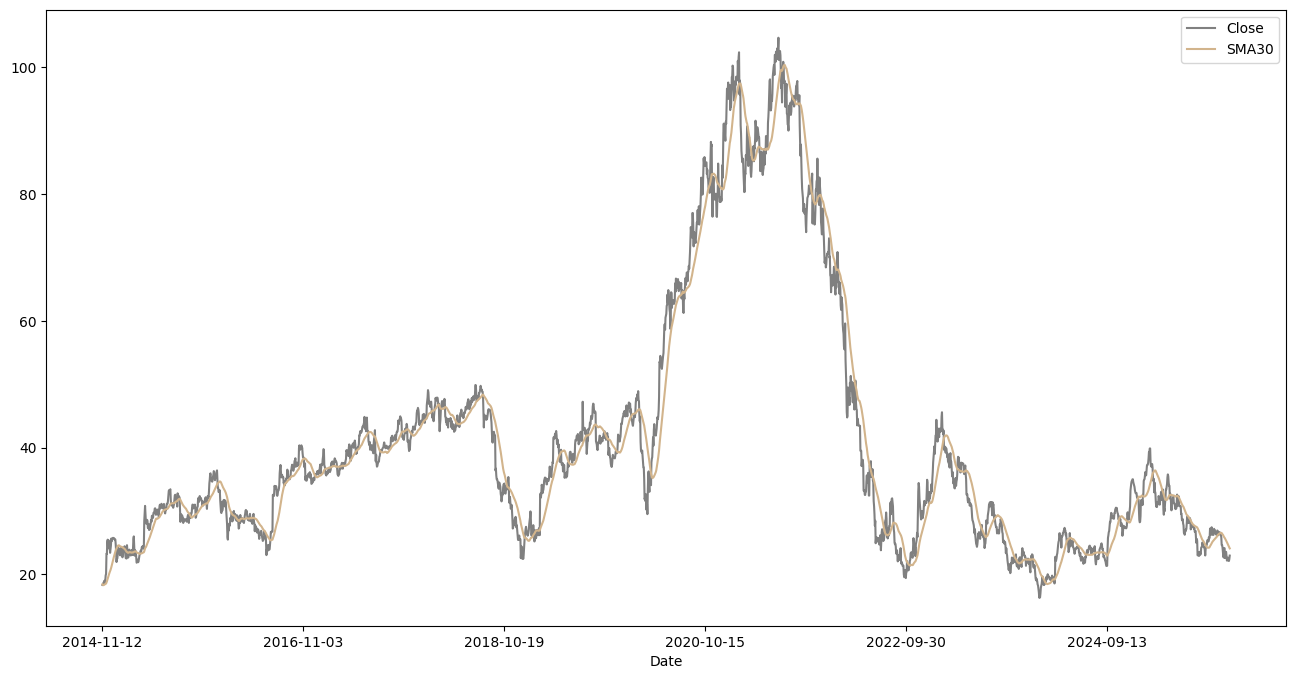

In [131]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
company[['Close', 'SMA30']].plot(label='COMPANY',figsize=(16, 8), color=['grey', 'tan'])

In [132]:
# EXPONENTIAL MOVING AVERAGE - 30 days
# Extract and isolate 'Close' column, converting to DataFrame
company = company['Close'].to_frame()
company['Close'] = pd.to_numeric(company['Close'], downcast='float')

# Calculate Exponential Moving Average (EWMA) with a span of 30
company['EWMA30'] = company['Close'].ewm(span=30).mean()

# Print DataFrame
company

,Close,EWMA30
Date,,
2014-11-12,18.320000,18.320000
2014-11-13,18.299999,18.309666
2014-11-14,18.590000,18.409407
2014-11-17,18.600000,18.461923
2014-11-18,18.940001,18.570697
...,...,...
2025-11-20,22.610001,24.125364
2025-11-21,22.139999,23.997276
2025-11-24,22.110001,23.875516


<Axes: xlabel='Date'>

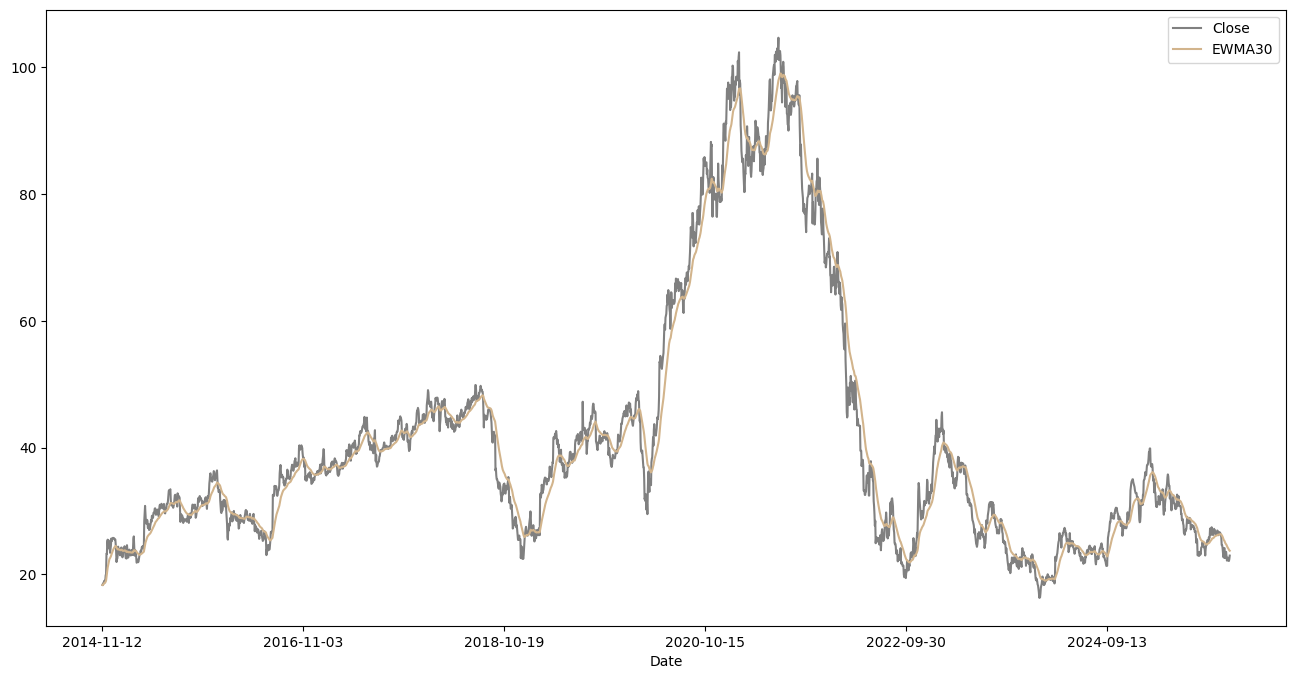

In [133]:
# plotting Close price and exponential
# moving averages of 30 days
# using .plot() method
company[['Close', 'EWMA30']].plot(label='COMPANY',figsize=(16, 8), color=['grey', 'tan'])

In [134]:
# CUMULATIVE MOVING AVERAGE - 30 days
# Extract and isolate 'Close' column, converting to DataFrame
company = company['Close'].to_frame()
company['Close'] = pd.to_numeric(company['Close'], downcast='float')

# Calculate Cumulative Moving Average (CMA) with a window of 30
company['CMA30'] = company['Close'].expanding().mean()

# Print DataFrame
company

,Close,CMA30
Date,,
2014-11-12,18.320000,18.320000
2014-11-13,18.299999,18.309999
2014-11-14,18.590000,18.403333
2014-11-17,18.600000,18.452500
2014-11-18,18.940001,18.550000
...,...,...
2025-11-20,22.610001,40.908394
2025-11-21,22.139999,40.901698
2025-11-24,22.110001,40.894996


<Axes: xlabel='Date'>

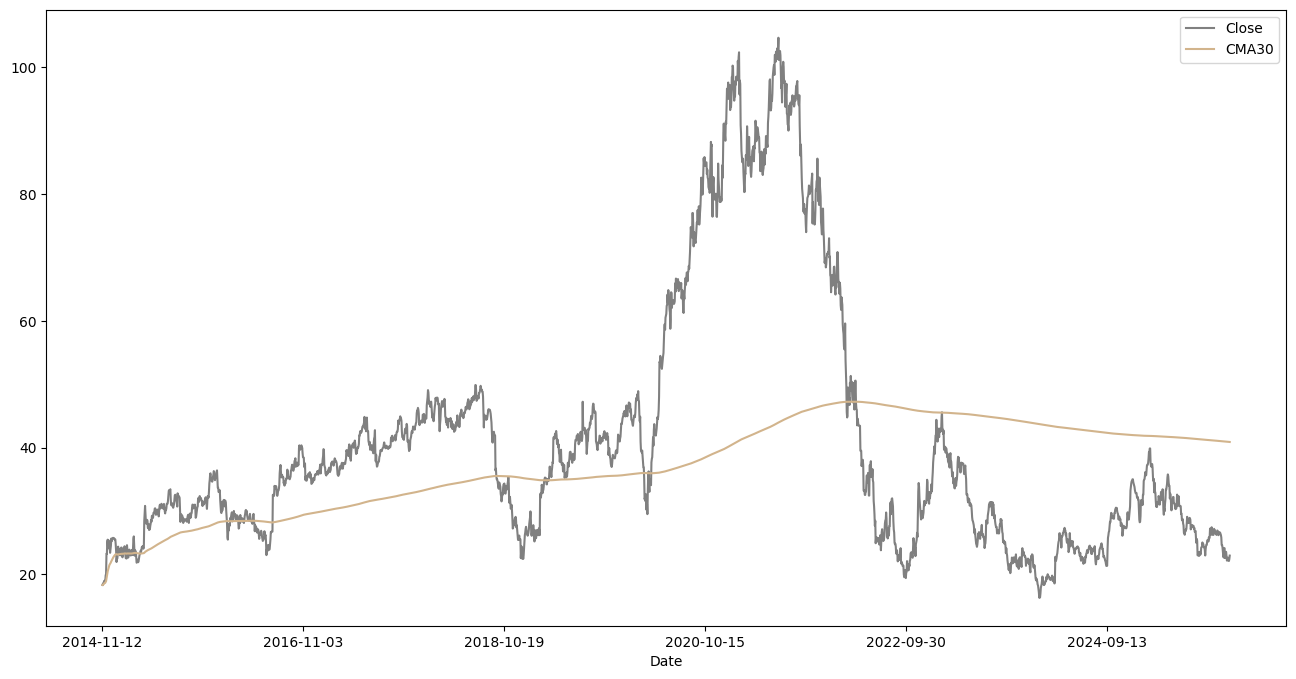

In [135]:
# plotting Close price and cumulative moving
# average of 30 days using .plot() method
company[['Close', 'CMA30']].plot(label='COMPANY',figsize=(16, 8), color=['grey', 'tan'])

In [ ]:
# https://stackoverflow.com/questions/70090315/balance-sheet-from-using-yfinance-does-not-have-total-debt-like-on-yahoo-finan
# https://www.google.com/search?q=python+liquidity&rlz=1CAHUTT_enAT1105&oq=python+liquidity&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTILCAEQABgNGBMYgAQyCwgCEAAYDRgTGIAEMgoIAxAAGA0YExgeMgwIBBAAGAoYDRgTGB4yCggFEAAYDRgTGB4yCggGEAAYDRgTGB4yCggHEAAYDRgTGB4yCggIEAAYDRgTGB4yCggJEAAYDRgTGB7SAQk3MzIxajBqMTWoAgywAgHxBa7A-IX_N5pz&sourceid=chrome&ie=UTF-8
# https://www.excelpricefeed.com/userguide/excel-formula-yahoo-finance/stocks-financials-balance-sheet
# https://ranaroussi.github.io/yfinance/
# https://www.kaggle.com/code/rizwanrizwannazir/python-for-finance-with-yfinance-stock-market
# https://www.geeksforgeeks.org/pandas/how-to-calculate-moving-average-in-a-pandas-dataframe/
